In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [7]:
# drop month, day and year

df.drop(['day', 'month', 'year'], axis = 1, inplace=True)

In [8]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [9]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [10]:
# Encoding
df['Classes'] = np.where(df['Classes'].str.contains("not fire"), 0, 1)

In [11]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [12]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [14]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [ ]:
# Independent and Dependent features

# Remove the column 'FWI' from the dataset and store remaining columns as input features (X)
X = df.drop('FWI', axis=1)

# Select the column 'FWI' as the target/output variable (y)
y = df['FWI']

In [16]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [17]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [18]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.5, random_state=42)

In [19]:
X_train.shape, X_test.shape

((121, 11), (122, 11))

In [20]:
# Feature Selection based on correlation

X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.629548,-0.275032,-0.334468,0.692928,0.526955,0.408943,0.610875,0.497731,0.546105,0.235690
RH,-0.629548,1.000000,0.218804,0.238679,-0.633760,-0.401741,-0.210469,-0.713804,-0.342890,-0.449932,-0.400363
Ws,-0.275032,0.218804,1.000000,0.276468,-0.159436,-0.003823,0.074557,-0.029568,0.028324,-0.100804,-0.189989
Rain,-0.334468,0.238679,0.276468,1.000000,-0.553689,-0.290332,-0.306338,-0.354670,-0.300936,-0.410625,-0.072397
FFMC,0.692928,-0.633760,-0.159436,-0.553689,1.000000,0.618557,0.523767,0.740955,0.602701,0.788668,0.221144
DMC,0.526955,-0.401741,-0.003823,-0.290332,0.618557,1.000000,0.883339,0.662162,0.984718,0.623561,0.177626
DC,0.408943,-0.210469,0.074557,-0.306338,0.523767,0.883339,1.000000,0.480589,0.949195,0.572174,-0.076725
ISI,0.610875,-0.713804,-0.029568,-0.354670,0.740955,0.662162,0.480589,1.000000,0.614249,0.724488,0.269873
BUI,0.497731,-0.342890,0.028324,-0.300936,0.602701,0.984718,0.949195,0.614249,1.000000,0.623985,0.083489
Classes,0.546105,-0.449932,-0.100804,-0.410625,0.788668,0.623561,0.572174,0.724488,0.623985,1.000000,0.155307


<Axes: >

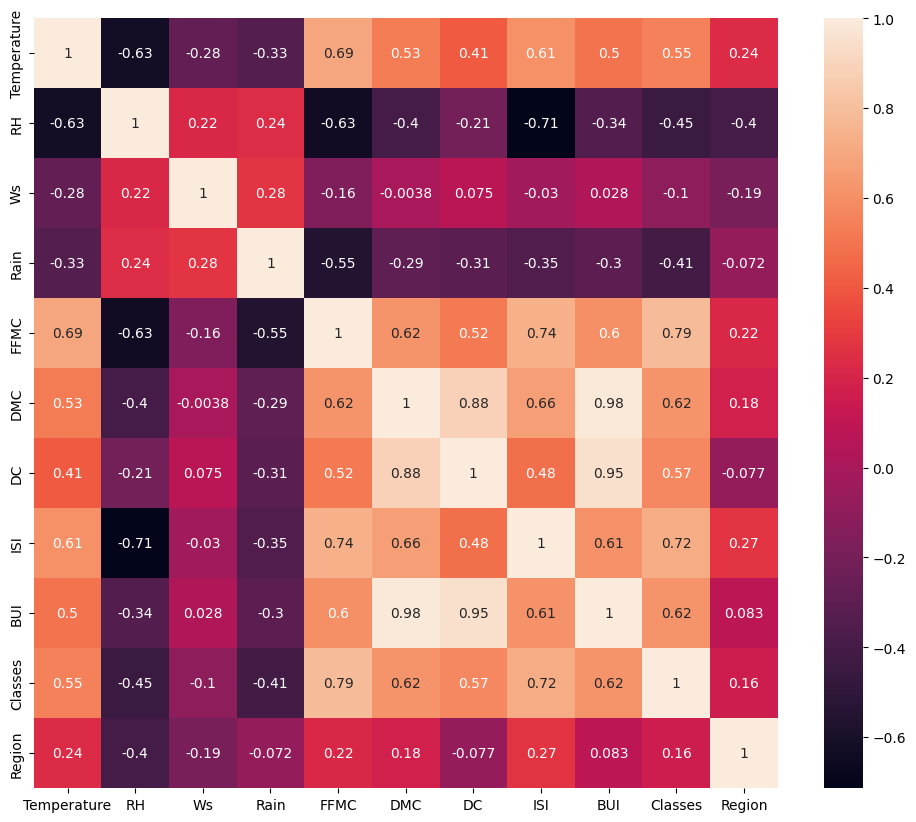

In [21]:
# check for multicollinearity

plt.figure(figsize = (12, 10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [ ]:
def correlation(dataset, threshold):
    # Create an empty set to store names of highly correlated columns
    col_corr = set()

    # Calculate correlation matrix of the dataset
    corr_matrix = dataset.corr()

    # Loop over all columns using index i
    for i in range(len(corr_matrix.columns)):

        # Loop over columns before i (to avoid duplicate checking)
        for j in range(i):

            # Check if absolute correlation value is greater than threshold
            if abs(corr_matrix.iloc[i, j]) > threshold:

                # Get the name of the column that is highly correlated
                colname = corr_matrix.columns[i]

                # Add this column name to the set
                col_corr.add(colname)

    # Return the set of highly correlated column names
    return col_corr

In [26]:
# threshold d--domain expertise
corr_features = correlation(X_train, 0.85)

In [ ]:
# Drop features when correlation is more than 0.85

# Remove highly correlated features from training data
X_train.drop(corr_features, axis=1, inplace=True)

# Remove the same correlated features from testing data
X_test.drop(corr_features, axis=1, inplace=True)

# Display the shape of X_train and X_test after dropping columns
X_train.shape, X_test.shape

((121, 9), (122, 9))

### **Feature Scaling or Standardization**

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [29]:
X_train_scaled

array([[ 0.85337191,  0.03263708,  0.93160102, ..., -0.43837123,
        -1.11388543, -1.02510851],
       [ 0.0424452 , -0.56976592, -0.6072894 , ...,  0.0786621 ,
         0.8977584 ,  0.97550649],
       [ 1.12368082, -1.23910258, -0.6072894 , ..., -0.62638335,
        -1.11388543, -1.02510851],
       ...,
       [-1.84971713,  0.83584107,  0.54687842, ..., -1.04941062,
        -1.11388543, -1.02510851],
       [ 0.58306301, -0.30203125,  0.16215581, ...,  0.64269845,
         0.8977584 ,  0.97550649],
       [-0.49817261,  0.90277473,  2.08576884, ..., -0.83789698,
        -1.11388543, -1.02510851]], shape=(121, 9))

### **Box plots to under Effect of Standard Scaler**

Text(0.5, 1.0, 'X_train After Scaling')

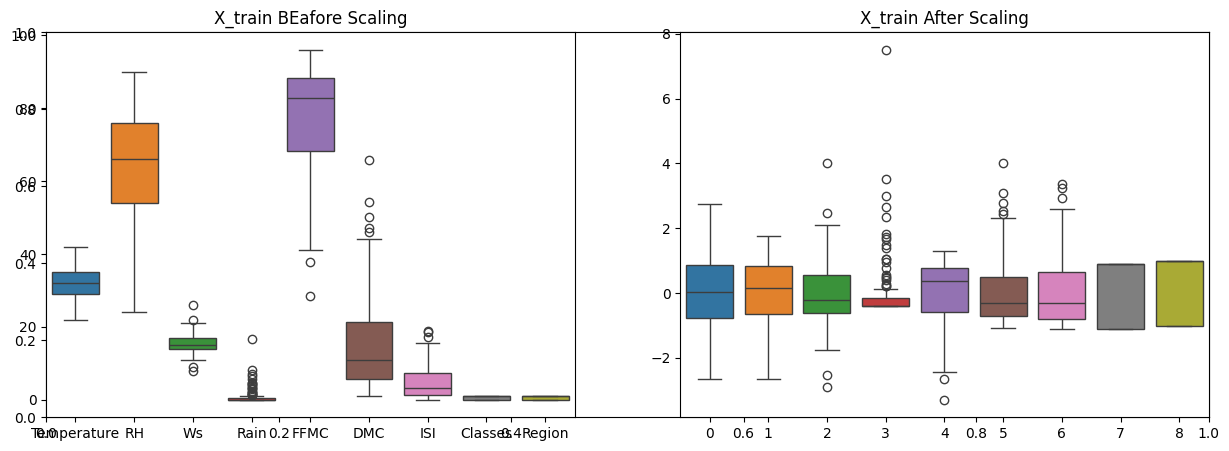

In [ ]:
# Create a figure with width 15 inches and height 5 inches
plt.subplots(figsize=(15, 5))

# Create the first subplot (1 row, 2 columns, position 1)
plt.subplot(1, 2, 1)

# Draw boxplot for X_train (before scaling)
sns.boxplot(data=X_train)

# Set title for first subplot
plt.title('X_train Before Scaling')

# Create the second subplot (1 row, 2 columns, position 2)
plt.subplot(1, 2, 2)

# Draw boxplot for X_train after scaling
sns.boxplot(data=X_train_scaled)

# Set title for second subplot
plt.title('X_train After Scaling')

# **Linear Regression Model**

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
# Create a Linear Regression model object
linreg = LinearRegression()

# Train the model using scaled training input data and actual output values
linreg.fit(X_train_scaled, y_train)

# Predict output values for scaled test input data
y_pred = linreg.predict(X_test_scaled)

# Calculate Mean Absolute Error between actual and predicted values
mae = mean_absolute_error(y_test, y_pred)

# Calculate R² score which tells how well the model fits the data
score = r2_score(y_test, y_pred)

# Print Mean Absolute Error
print("Mean absolute error", mae)

# Print R² score
print("R2 Score", score)

Mean absolute error 0.7516369815184943
R2 Score 0.980839555651011


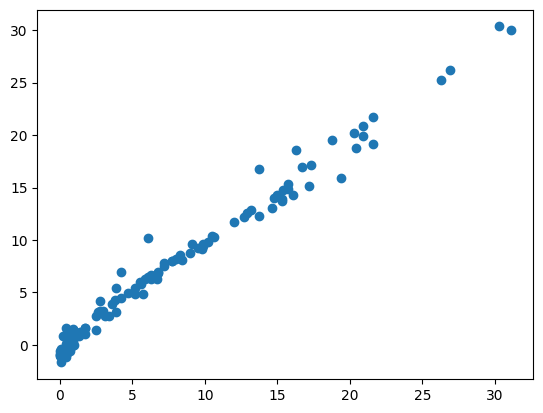

In [37]:
plt.scatter(y_test, y_pred)

### **Lasso Regression Model**

In [ ]:
# Import Lasso Regression model
from sklearn.linear_model import Lasso

# Create Lasso model object
lasso = Lasso()

# Train the Lasso model using scaled training input and actual output values
lasso.fit(X_train_scaled, y_train)

# Predict the output values for scaled test input data
y_pred = lasso.predict(X_test_scaled)

# Calculate Mean Absolute Error between actual and predicted values
mae = mean_absolute_error(y_test, y_pred)

# Calculate R² score which tells how well the Lasso model fits the data
score = r2_score(y_test, y_pred)

# Print Mean Absolute Error
print("Mean absolute error", mae)

# Print R² score (percentage of variation explained by the model)
print("R2 Score", score)

Mean absolute error 1.1699563483439808
R2 Score 0.9524566533681257


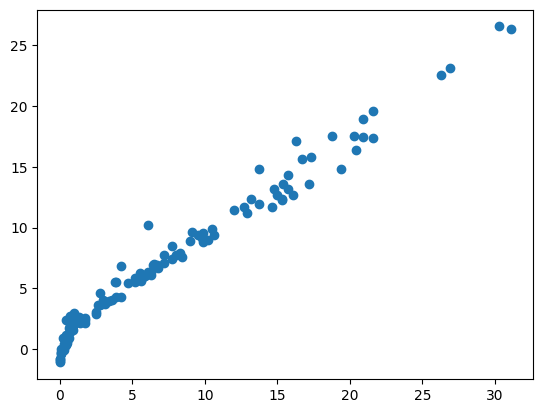

In [40]:
plt.scatter(y_test, y_pred)

#### **Cross Validation Lasso**

In [ ]:
# Import Lasso Regression with Cross Validation
from sklearn.linear_model import LassoCV

# Create LassoCV model object with 5-fold cross validation
lassocv = LassoCV(cv=5)

# Train the LassoCV model using scaled training input and actual output values
lassocv.fit(X_train_scaled, y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [ ]:
# Use the trained LassoCV model to predict output values for the scaled test dataset
lassocv.predict(X_test_scaled)

array([ 7.93778133,  7.37104193, -0.61942784,  5.01840938,  6.72133638,
        1.84897324,  1.94919746,  7.61161624,  1.89416413,  3.38236181,
        0.5071857 , 10.55882329,  9.24170149, 17.02810316, 18.19158904,
        1.67391718,  1.38444815, -1.83252154,  7.04939944,  2.95018647,
        1.8808783 , -0.37270136,  6.1013695 , -0.43515031, 20.60232424,
        4.9833429 ,  5.63783945,  9.60103508, -2.13527639,  9.67025717,
        6.46567038, -0.58725438, 10.07785095, 14.45170967,  1.64057239,
        0.85837704,  1.62258769,  5.94366362, -1.36682511, -1.36872308,
        6.26133387,  2.09470468,  8.31907187, -2.01417445, 15.2446504 ,
        8.12133222,  8.47541658,  1.13917496, 12.96838715,  0.89317512,
       29.46743977,  5.39301095, 16.73375102, 19.36573613, 13.33142458,
       16.39413175,  0.98137696,  8.9408446 ,  3.65501748, 14.41401857,
        5.02401119,  0.94803217, -0.85783578, 21.39608372,  3.38425979,
        1.69262853,  9.3796168 ,  6.68437192, 10.14427214, -1.84

In [48]:
lassocv.alpha_

np.float64(0.14450898883285757)

In [49]:
lassocv.alphas_

array([6.70751309, 6.25544916, 5.83385282, 5.44067066, 5.07398767,
       4.73201788, 4.41309572, 4.11566784, 3.8382856 , 3.57959799,
       3.33834507, 3.11335179, 2.9035223 , 2.70783461, 2.52533562,
       2.35513645, 2.19640814, 2.04837758, 1.91032379, 1.78157436,
       1.66150221, 1.54952252, 1.44508989, 1.34769567, 1.25686549,
       1.17215696, 1.09315751, 1.01948235, 0.95077265, 0.88669376,
       0.82693356, 0.77120101, 0.71922464, 0.67075131, 0.62554492,
       0.58338528, 0.54406707, 0.50739877, 0.47320179, 0.44130957,
       0.41156678, 0.38382856, 0.3579598 , 0.33383451, 0.31133518,
       0.29035223, 0.27078346, 0.25253356, 0.23551365, 0.21964081,
       0.20483776, 0.19103238, 0.17815744, 0.16615022, 0.15495225,
       0.14450899, 0.13476957, 0.12568655, 0.1172157 , 0.10931575,
       0.10194823, 0.09507727, 0.08866938, 0.08269336, 0.0771201 ,
       0.07192246, 0.06707513, 0.06255449, 0.05833853, 0.05440671,
       0.05073988, 0.04732018, 0.04413096, 0.04115668, 0.03838

In [50]:
lassocv.mse_path_

array([[ 40.03323423,  53.87976206, 106.43657885,  31.42138072,
         42.61929698],
       [ 34.55930575,  49.50416259, 106.43657885,  28.97250845,
         37.20387182],
       [ 29.88484931,  44.34372814, 106.43657885,  26.77796141,
         32.11599203],
       [ 25.90000197,  38.93500652, 103.9659018 ,  23.53632148,
         27.72011431],
       [ 22.50931802,  34.21770715,  94.80375644,  20.7155664 ,
         23.92397926],
       [ 19.63057887,  30.10265057,  86.69383165,  18.26164699,
         20.64784453],
       [ 17.19225584,  26.51221855,  79.50858822,  16.12647876,
         17.82215594],
       [ 15.13257262,  23.37884313,  71.30073911,  14.26860277,
         15.38664335],
       [ 13.39787406,  20.64370669,  63.38136253,  12.6519564 ,
         13.28888513],
       [ 11.94242373,  18.25560452,  56.43001955,  11.24517052,
         11.48372374],
       [ 10.72606454,  16.16994974,  50.32455103,  10.02067527,
          9.93163408],
       [  9.71431722,  14.34794021,  44.958

Mean absolute error 0.822437661720615
R2 Score 0.9757628402558544


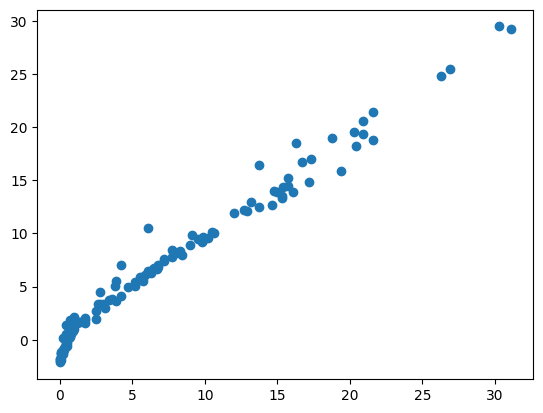

In [52]:
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)

# Calculate Mean Absolute Error between actual and predicted values
mae = mean_absolute_error(y_test, y_pred)

# Calculate R² score which tells how well the Lasso model fits the data
score = r2_score(y_test, y_pred)

# Print Mean Absolute Error
print("Mean absolute error", mae)

# Print R² score (percentage of variation explained by the model)
print("R2 Score", score)

### **Ridge Regression Model**

In [ ]:
# Import Ridge Regression model
from sklearn.linear_model import Ridge

# Create Ridge model object
ridge = Ridge()

# Train the Ridge model using scaled training input and actual output values
ridge.fit(X_train_scaled, y_train)

# Predict the output values for scaled test input data
y_pred = ridge.predict(X_test_scaled)

# Calculate Mean Absolute Error between actual and predicted values
mae = mean_absolute_error(y_test, y_pred)

# Calculate R² score which tells how well the Lasso model fits the data
score = r2_score(y_test, y_pred)

# Print Mean Absolute Error
print("Mean absolute error", mae)

# Print R² score (percentage of variation explained by the model)
print("R2 Score", score)


Mean absolute error 0.767573461839778
R2 Score 0.9802913821464506


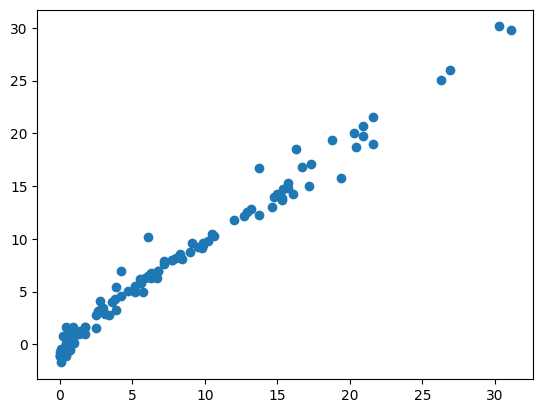

In [42]:
plt.scatter(y_test, y_pred)

Mean absolute error 0.767573461839778
R2 Score 0.9802913821464506


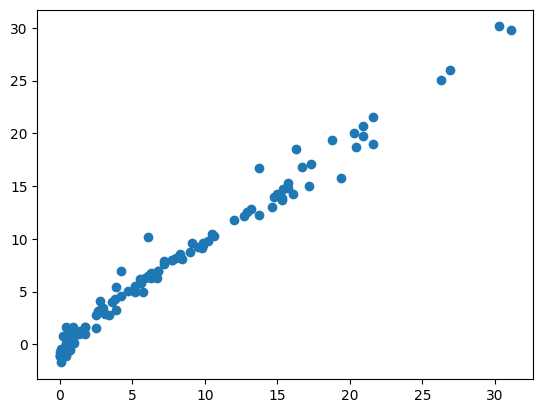

In [54]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(X_train_scaled, y_train)

y_pred = ridgecv.predict(X_test_scaled)

# Calculate Mean Absolute Error between actual and predicted values
mae = mean_absolute_error(y_test, y_pred)

# Calculate R² score which tells how well the Lasso model fits the data
score = r2_score(y_test, y_pred)

# Print Mean Absolute Error
print("Mean absolute error", mae)

# Print R² score (percentage of variation explained by the model)
print("R2 Score", score)

plt.scatter(y_test, y_pred)

In [55]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [57]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

## **Elasticnet Regression Model**

In [43]:
# Import ElasticNet Regression model
from sklearn.linear_model import ElasticNet

# Create ElasticNet model object
elasticNet = ElasticNet()

# Train the ElasticNet model using scaled training input and actual output values
elasticNet.fit(X_train_scaled, y_train)

# Predict the output values for scaled test input data
y_pred = elasticNet.predict(X_test_scaled)

# Calculate Mean Absolute Error between actual and predicted values
mae = mean_absolute_error(y_test, y_pred)

# Calculate R² score which tells how well the Lasso model fits the data
score = r2_score(y_test, y_pred)

# Print Mean Absolute Error
print("Mean absolute error", mae)

# Print R² score (percentage of variation explained by the model)
print("R2 Score", score)

Mean absolute error 1.8604941941996511
R2 Score 0.8852463496400588


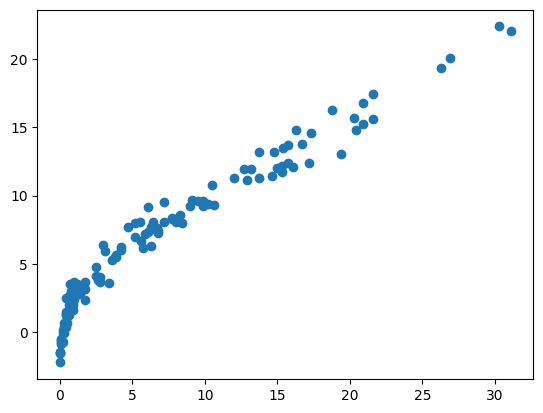

In [44]:
plt.scatter(y_test, y_pred)

Mean absolute error 0.7893352739069013
R2 Score 0.9793319905430947


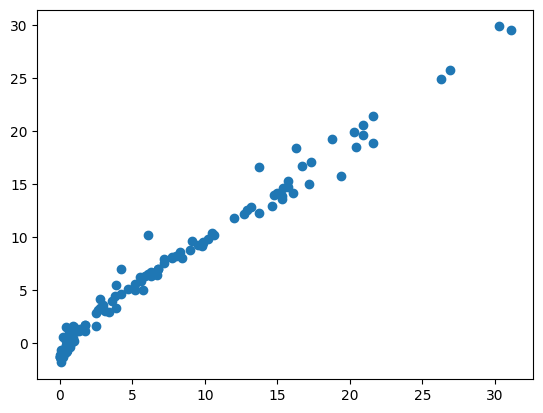

In [58]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV(cv = 5)
elasticcv.fit(X_train_scaled, y_train)

y_pred = elasticcv.predict(X_test_scaled)

# Calculate Mean Absolute Error between actual and predicted values
mae = mean_absolute_error(y_test, y_pred)

# Calculate R² score which tells how well the Lasso model fits the data
score = r2_score(y_test, y_pred)

# Print Mean Absolute Error
print("Mean absolute error", mae)

# Print R² score (percentage of variation explained by the model)
print("R2 Score", score)

plt.scatter(y_test, y_pred)

In [59]:
elasticcv.alphas_

array([13.41502618, 12.51089831, 11.66770564, 10.88134133, 10.14797534,
        9.46403577,  8.82619143,  8.23133567,  7.6765712 ,  7.15919599,
        6.67669014,  6.22670357,  5.80704459,  5.41566922,  5.05067124,
        4.7102729 ,  4.39281627,  4.09675516,  3.82064757,  3.56314871,
        3.32300442,  3.09904504,  2.89017978,  2.69539133,  2.51373098,
        2.34431392,  2.18631501,  2.0389647 ,  1.9015453 ,  1.77338751,
        1.65386713,  1.54240202,  1.43844929,  1.34150262,  1.25108983,
        1.16677056,  1.08813413,  1.01479753,  0.94640358,  0.88261914,
        0.82313357,  0.76765712,  0.7159196 ,  0.66766901,  0.62267036,
        0.58070446,  0.54156692,  0.50506712,  0.47102729,  0.43928163,
        0.40967552,  0.38206476,  0.35631487,  0.33230044,  0.3099045 ,
        0.28901798,  0.26953913,  0.2513731 ,  0.23443139,  0.2186315 ,
        0.20389647,  0.19015453,  0.17733875,  0.16538671,  0.1542402 ,
        0.14384493,  0.13415026,  0.12510898,  0.11667706,  0.10